### Model Training

In [1]:
#Basic Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [3]:
X= df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [4]:
print("Categories in 'gender' are: ", df['gender'].unique())
print("Categories in 'race_ethnicity' are: ", df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' are: ", df['parental_level_of_education'].unique())
print("Categories in 'lunch' are: ", df['lunch'].unique())
print("Categories in 'test_preparation_course' are: ", df['test_preparation_course'].unique())

Categories in 'gender' are:  ['female' 'male']
Categories in 'race_ethnicity' are:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' are:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' are:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' are:  ['none' 'completed']


In [5]:
Y= df['math_score']
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [6]:
# Create Column Transformer with 3 types of transformers
num_features= X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer= StandardScaler()
oh_transformer= OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", num_transformer, num_features)
    ]
)

In [7]:
X= preprocessor.fit_transform(X)

In [8]:
X.shape

(1000, 19)

In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state=42, train_size=0.7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((700, 19), (300, 19), (700,), (300,))

#### Evaluate Function to be given to all metrics after model Training

In [10]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(true, predicted):
    mae= mean_absolute_error(true, predicted)
    mse= mean_squared_error(true, predicted)
    rmse= np.sqrt(mean_squared_error(true, predicted))
    r2_square= r2_score(true, predicted)

    return mae, rmse, r2_square

#### Training Models

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV

models= {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Support Vector Regression": SVR(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "XGBRegressor": XGBRegressor()
}

model_list= []
r2_list=[]

In [12]:
for i in range(len(list(models))):
    model= list(models.values())[i]

    # Check if the model has a `verbose` or `logging_level` parameter, e.g., CatBoost
    if hasattr(model, 'verbose'):
        model.set_params(verbose=0)
    if hasattr(model, 'logging_level'):
        model.set_params(logging_level='Silent')


    model.fit(X_train, Y_train) #Train Model

    #Make Predictions
    Y_train_predict= model.predict(X_train)
    Y_test_predict= model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2= evaluate_model(Y_train, Y_train_predict)
    model_test_mae, model_test_rmse, model_test_r2= evaluate_model(Y_test, Y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.2679
- Mean Absolute Error: 4.2080
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6330
- Mean Absolute Error: 4.4779
- R2 Score: 0.8725


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


Support Vector Regression
Model performance for Training set
- Root Mean Squared Error: 6.7557
- Mean Absolute Error: 4.9467
- R2 Score: 0.7931
--------------------

In [13]:
import sys
import io

# Iterate through the models
for i in range(len(list(models))):
    model = list(models.values())[i]

    # Check if the model has a `verbose` or `logging_level` parameter, e.g., CatBoost
    if hasattr(model, 'verbose'):
        model.set_params(verbose=0)
    if hasattr(model, 'logging_level'):
        model.set_params(logging_level='Silent')

    # Redirect stdout to suppress output
    old_stdout = sys.stdout
    sys.stdout = io.StringIO()

    # Train the model
    model.fit(X_train, Y_train)

    # Restore stdout
    sys.stdout = old_stdout

    # Make Predictions
    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_predict)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_predict)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')

LinearRegression
Model performance for Training set
- Root Mean Squared Error: 5.2679
- Mean Absolute Error: 4.2080
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6330
- Mean Absolute Error: 4.4779
- R2 Score: 0.8725


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5106
- Mean Absolute Error: 5.1582
- R2 Score: 0.8078
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8705
- Mean Absolute Error: 5.3929
- R2 Score: 0.8103


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2487
- Mean Absolute Error: 4.1977
- R2 Score: 0.8751
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5566
- Mean Absolute Error: 4.4155
- R2 Score: 0.8759


Support Vector Regression
Model performance for Training set
- Root Mean Squared Error: 6.7557
- Mean Absolute Error: 4.9467
- R2 Score: 0.7931
--------------------

#### Result

In [14]:
best_models = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score'])
best_models = best_models.groupby('Model Name').max().sort_values(by="R2_Score", ascending=False)
best_models

,R2_Score
Model Name,
Ridge,0.875907
LinearRegression,0.872469
CatBoostRegressor,0.852108
RandomForestRegressor,0.846738
AdaBoostRegressor,0.836300
XGBRegressor,0.811816
Lasso,0.810281
KNeighborsRegressor,0.772528
DecisionTreeRegressor,0.741182


#### Ridge

In [15]:
ridge_model = Ridge(alpha=1.0)
ridge_model= ridge_model.fit(X_train, Y_train)
Y_predict= ridge_model.predict(X_test)
score= r2_score(Y_test, Y_predict)*100
print("Accuracy of model is ", score)
print("Accuracy of model is %.2f" %score)

Accuracy of model is  87.5906778443454
Accuracy of model is 87.59


#### Plot Y_predict and Y_test

Text(0, 0.5, 'Predicted Values')

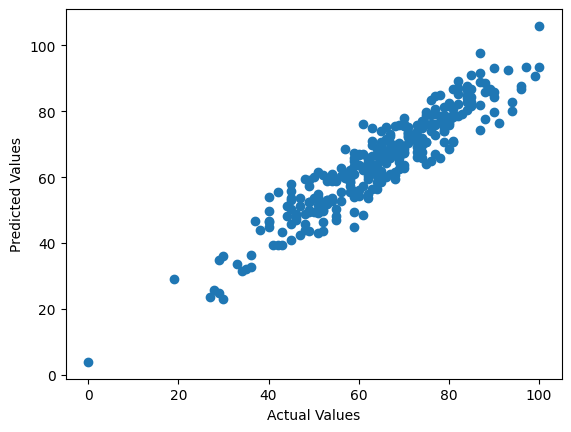

In [16]:
plt.scatter(Y_test, Y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<Axes: xlabel='math_score'>

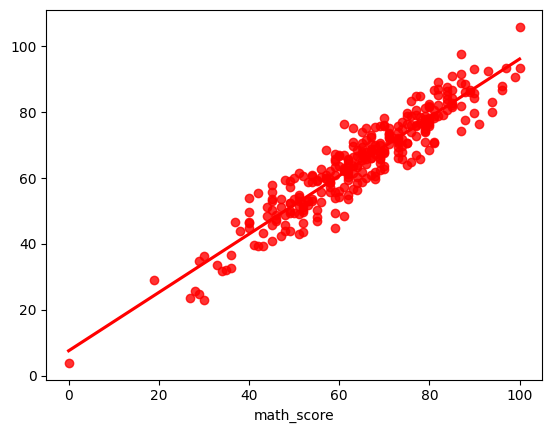

In [17]:
sns.regplot(x=Y_test,y=Y_predict,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [18]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_predict,'Difference':Y_test-Y_predict})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.522653,14.477347
737,53,58.853377,-5.853377
740,80,76.935975,3.064025
660,74,76.919776,-2.919776
411,84,87.620347,-3.620347
...,...,...,...
468,77,72.886106,4.113894
935,70,62.627388,7.372612
428,65,58.636648,6.363352
7,40,44.853500,-4.853500
